In [2]:
# DATA PREPROCESSING AND CLEANING


In [4]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd # used for data manipulation analysis
from sklearn.model_selection import train_test_split # this function is used to spllit your dataset into training and testing data set
from sklearn.ensemble import RandomForestClassifier # it builts multiple decision trees combines to improve accuracy to prevent overfitting
from sklearn.metrics import classification_report # gives detailed performance report of a classification model
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('stock_data (1).csv')
df

,Price,Open,High,Low,Close,Volume,Return,RSI,MACD,EMA_10,EMA_30,Target_Cls,Future_Close
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-07,53.9250914506971,54.00262556399122,52.41663640081931,52.455902099609375,51942000,-0.026761,31.864545,-0.085129,55.607799,55.799146,0.0,53.315250
3,2018-02-08,52.67757509163033,52.87936401239792,49.93552094259068,50.08512496948242,66792000,-0.045196,25.466468,-0.536176,54.603677,55.430499,1.0,54.242695
4,2018-02-09,50.9882059680197,52.27250343791082,49.55281423202895,52.00162887573242,98360000,0.038265,36.556495,-0.730566,54.130577,55.209282,1.0,54.448456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,2023-12-15,130.8353103484466,132.7140420448189,130.39793108913113,131.80947875976562,50815200,0.005002,48.532142,-0.180260,132.135765,132.399491,1.0,140.646500
1477,2023-12-18,131.8393026763813,136.33234480658354,131.64048288499953,134.9904022216797,32258000,0.024133,55.535885,0.053972,132.654790,132.566647,1.0,140.676331
1478,2023-12-19,136.02422741163292,136.65047653282204,135.26876359698784,135.83535766601562,25476800,0.006259,57.201918,0.304277,133.233075,132.777531,1.0,139.533173
1479,2023-12-20,138.14152311829278,140.85524381049996,137.24689459008206,137.51527404785156,49107200,0.012367,60.380420,0.630927,134.011657,133.083192,1.0,139.393997


In [6]:
# load the data from csv file and cleaning
def load_and_clean_data(file_path): # this should be the path (string) to a CSV file
    try:# Python will "try" to execute the code inside this block.
        df = pd.read_csv('stock_data (1).csv', header=[0, 1]) # 0,1 says multi level header
    except FileNotFoundError: # If the file specified in file_path does not exist, a FileNotFoundError will be raised.
        print(f"Error: The file '{file_path}' was not found.") #Prints an error message using f-string formatting.
    return None
    df = df.iloc[1:].copy() # selects all rows starting from the second row (index 1).
    new_columns = [] #  empty bracket
    for col in df.columns: # Loops over each column in the DataFrame.
        if 'Unnamed' in col[1]:
            new_columns.append(col[0]) # If "Unnamed" is found in col[1], it means the second header is not meaningful, In that case, just use the first part (col[0]) as the column name.
        else:
            new_columns.append(col[0] +  '_' + col[1]) # If the second-level column (col[1]) is not unnamed, then combine both levels. d + sa - dsa
    df.columns = new_columns # Replaces the old multi-level column names with the new flattened names stored in new_columns.
    df = df.rename(columns={'Price_Ticker': 'Date'}) # Renames the column "Price_Ticker" to "Date".
    df['Date'] = pd.to_datetime(df['Date'])# Converts the "Date" column from string format (e.g., "2025-09-05") into a proper datetime object.
    df.set_index('Date', inplace=True)# inplace=True means the change happens directly in df.
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #pd.to_numeric() tries to change each value to a number. # errors='coerce' → if a value cannot be converted (e.g., "N/A", "--", "abc"), it will be replaced with NaN instead of throwing an error.

        df.dropna(inplace=True)
        return df
        print("Data has been successfully loaded and cleaned.")


In [7]:
import pandas as pd

df = pd.read_csv("stock_data (1).csv", header=[0, 1])
print(df.columns)


MultiIndex([(       'Price',              'Ticker'),
            (        'Open',               'GOOGL'),
            (        'High',               'GOOGL'),
            (         'Low',               'GOOGL'),
            (       'Close',               'GOOGL'),
            (      'Volume',               'GOOGL'),
            (      'Return',  'Unnamed: 6_level_1'),
            (         'RSI',  'Unnamed: 7_level_1'),
            (        'MACD',  'Unnamed: 8_level_1'),
            (      'EMA_10',  'Unnamed: 9_level_1'),
            (      'EMA_30', 'Unnamed: 10_level_1'),
            (  'Target_Cls', 'Unnamed: 11_level_1'),
            ('Future_Close', 'Unnamed: 12_level_1')],
           )


In [8]:
print(df.columns.tolist()) # is used to display the column names of a pandas DataFrame as a Python list.


[('Price', 'Ticker'), ('Open', 'GOOGL'), ('High', 'GOOGL'), ('Low', 'GOOGL'), ('Close', 'GOOGL'), ('Volume', 'GOOGL'), ('Return', 'Unnamed: 6_level_1'), ('RSI', 'Unnamed: 7_level_1'), ('MACD', 'Unnamed: 8_level_1'), ('EMA_10', 'Unnamed: 9_level_1'), ('EMA_30', 'Unnamed: 10_level_1'), ('Target_Cls', 'Unnamed: 11_level_1'), ('Future_Close', 'Unnamed: 12_level_1')]


In [9]:
features = [
    'GOOGL_Open', 'GOOGL_High', 'GOOGL_Low', 'GOOGL_Close', 'GOOGL_Volume',
    'Return', 'RSI', 'MACD', 'EMA_10', 'EMA_30'
] # Features help summarize important patterns in those numbers.


In [10]:
print(df.columns.tolist()) # Converts that Index object into a regular Python list.

[('Price', 'Ticker'), ('Open', 'GOOGL'), ('High', 'GOOGL'), ('Low', 'GOOGL'), ('Close', 'GOOGL'), ('Volume', 'GOOGL'), ('Return', 'Unnamed: 6_level_1'), ('RSI', 'Unnamed: 7_level_1'), ('MACD', 'Unnamed: 8_level_1'), ('EMA_10', 'Unnamed: 9_level_1'), ('EMA_30', 'Unnamed: 10_level_1'), ('Target_Cls', 'Unnamed: 11_level_1'), ('Future_Close', 'Unnamed: 12_level_1')]


In [11]:
# --- 2. Splitting Data into Features and Target ---

# Define the features (X): input variables for the model
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'Return', 'RSI', 'MACD', 'EMA_10', 'EMA_30'
]

# Define the target (y): variable to predict
target = 'Target_Cls' # This specifies the dependent variable (what you want to predict).

# Select features and target
X = df[features].copy() # X = only the features columns listed in features.
y = df[target].copy() # y = only the target column (Target_Cls).

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # 20% of data goes into testing, 80% for training., ensures reproducibility (you get the same random split every time you run it).
)

# Display sizes
print("\nData has been split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Data has been split into training and testing sets.
Training set size: 1184 samples
Testing set size: 296 samples


In [13]:
print(X.dtypes)



Open    GOOGL                  float64
High    GOOGL                  float64
Low     GOOGL                  float64
Close   GOOGL                  float64
Volume  GOOGL                  float64
Return  Unnamed: 6_level_1     float64
RSI     Unnamed: 7_level_1     float64
MACD    Unnamed: 8_level_1     float64
EMA_10  Unnamed: 9_level_1     float64
EMA_30  Unnamed: 10_level_1    float64
dtype: object


In [21]:
print(X.head())

        Open       High        Low      Close      Volume             Return  \
       GOOGL      GOOGL      GOOGL      GOOGL       GOOGL Unnamed: 6_level_1   
0        NaN        NaN        NaN        NaN         NaN                NaN   
1  53.925091  54.002626  52.416636  52.455902  51942000.0          -0.026761   
2  52.677575  52.879364  49.935521  50.085125  66792000.0          -0.045196   
3  50.988206  52.272503  49.552814  52.001629  98360000.0           0.038265   
4  52.518532  52.960879  51.962867  52.413662  56240000.0           0.007923   

                 RSI               MACD             EMA_10              EMA_30  
  Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1 Unnamed: 10_level_1  
0                NaN                NaN                NaN                 NaN  
1          31.864545          -0.085129          55.607799           55.799146  
2          25.466468          -0.536176          54.603677           55.430499  
3          36.556495          -0.7

In [22]:
df = pd.read_csv("stock_data (1).csv")

# Drop rows where "Open" is not numeric (like "GOOGL" or NaN)
df = df[pd.to_numeric(df['Open'], errors='coerce').notnull()]
df = df.reset_index(drop=True)
df # droping 1 st and 2 nd row 


,Price,Open,High,Low,Close,Volume,Return,RSI,MACD,EMA_10,EMA_30,Target_Cls,Future_Close
0,2018-02-07,53.9250914506971,54.00262556399122,52.41663640081931,52.455902099609375,51942000,-0.026761,31.864545,-0.085129,55.607799,55.799146,0.0,53.315250
1,2018-02-08,52.67757509163033,52.87936401239792,49.93552094259068,50.08512496948242,66792000,-0.045196,25.466468,-0.536176,54.603677,55.430499,1.0,54.242695
2,2018-02-09,50.9882059680197,52.27250343791082,49.55281423202895,52.00162887573242,98360000,0.038265,36.556495,-0.730566,54.130577,55.209282,1.0,54.448456
3,2018-02-12,52.51853228906446,52.96087911223059,51.962866655883275,52.41366195678711,56240000,0.007923,38.669330,-0.841672,53.818411,55.028919,0.0,54.850544
4,2018-02-13,52.18701743613438,52.74467381294293,52.03393618570592,52.392784118652344,31586000,-0.000398,38.599185,-0.920795,53.559206,54.858846,1.0,55.355515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2023-12-15,130.8353103484466,132.7140420448189,130.39793108913113,131.80947875976562,50815200,0.005002,48.532142,-0.180260,132.135765,132.399491,1.0,140.646500
1475,2023-12-18,131.8393026763813,136.33234480658354,131.64048288499953,134.9904022216797,32258000,0.024133,55.535885,0.053972,132.654790,132.566647,1.0,140.676331
1476,2023-12-19,136.02422741163292,136.65047653282204,135.26876359698784,135.83535766601562,25476800,0.006259,57.201918,0.304277,133.233075,132.777531,1.0,139.533173
1477,2023-12-20,138.14152311829278,140.85524381049996,137.24689459008206,137.51527404785156,49107200,0.012367,60.380420,0.630927,134.011657,133.083192,1.0,139.393997


In [24]:
X = X.apply(pd.to_numeric, errors='coerce') # apply() runs a function column by column on the DataFrame.
# coerce' -> replace the value by nan values

In [25]:
# Drop rows with NaN values
X = X.dropna() # dropna() removes any rows in X that contain at least one NaN value.
y = y.loc[X.index]  # keep y aligned with X


In [30]:
# Ensure features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X = X.dropna()
y = y.loc[X.index]

# Train-test split again to stay aligned
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the RandomForest model
print("\nStarting model training...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")



Starting model training...


C:\Users\rajku\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model training complete.



Accuracy: 0.4865

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.43      0.47      0.45       133
         1.0       0.54      0.50      0.52       163

    accuracy                           0.49       296
   macro avg       0.49      0.49      0.48       296
weighted avg       0.49      0.49      0.49       296



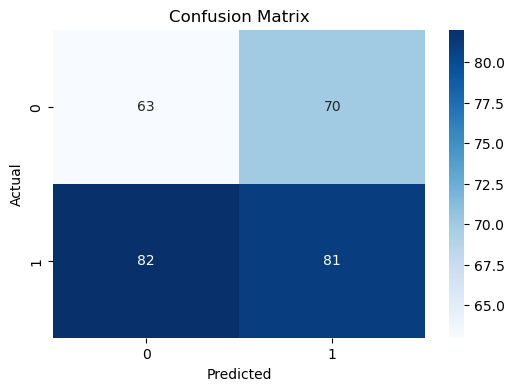

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Accuracy score
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

# Detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


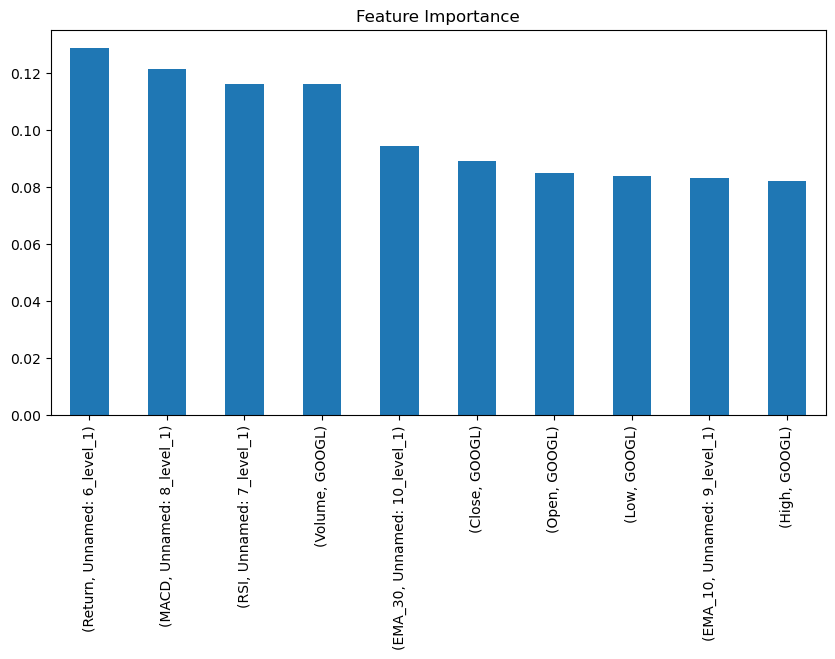

In [33]:
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [34]:
new_data = pd.DataFrame([{
    "Open": 2850,
    "High": 2900,
    "Low": 2840,
    "Close": 2890,
    "Volume": 1200000,
    "Return": 0.015,
    "RSI": 65,
    "MACD": 1.2,
    "EMA_10": 2875,
    "EMA_30": 2800
}])

prediction = model.predict(new_data)[0]
print("Predicted Class:", prediction)


Predicted Class: 0.0


C:\Users\rajku\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [36]:
# --- Predict Tomorrow's Movement ---

# Take the most recent row of features
latest_data = X.iloc[[-1]]   # double brackets keeps it as a DataFrame

# Predict using the trained model
tomorrow_pred = model.predict(latest_data)[0]

# Map prediction to meaning (assuming 0 = Down, 1 = Up)
movement = "UP 📈" if tomorrow_pred == 1 else "DOWN 📉"

print("\n--- Tomorrow's Prediction ---")
print(f"Predicted Target_Cls: {tomorrow_pred} → Stock will likely go {movement}")



--- Tomorrow's Prediction ---
Predicted Target_Cls: 1.0 → Stock will likely go UP 📈


In [40]:
# --- Predict Tomorrow's Movement and Save to DataFrame ---

# Take the most recent row of features
latest_data = X.iloc[[-1]]   # keep as DataFrame

# Predict tomorrow's class
tomorrow_pred = model.predict(latest_data)[0]

# Get prediction probabilities
prob = model.predict_proba(latest_data)[0]

# Map prediction to meaning
movement = "UP 📈" if tomorrow_pred == 1 else "DOWN 📉"

print("\n--- Tomorrow's Prediction ---")
print(f"Predicted Target_Cls: {tomorrow_pred} → Stock will likely go {movement}")
print(f"Down (0): {prob[0]:.2%}, Up (1): {prob[1]:.2%}")

# --- Append prediction into DataFrame ---
df.loc[df.index[-1], "Predicted_Tomorrow"] = tomorrow_pred
df.loc[df.index[-1], "Prob_Down"] = prob[0]
df.loc[df.index[-1], "Prob_Up"] = prob[1]

print("\nPrediction appended to DataFrame!")
print(df.tail())   # show last few rows with prediction



--- Tomorrow's Prediction ---
Predicted Target_Cls: 1.0 → Stock will likely go UP 📈
Down (0): 10.00%, Up (1): 90.00%

Prediction appended to DataFrame!
           Price                Open                High                 Low  \
1474  2023-12-15   130.8353103484466   132.7140420448189  130.39793108913113   
1475  2023-12-18   131.8393026763813  136.33234480658354  131.64048288499953   
1476  2023-12-19  136.02422741163292  136.65047653282204  135.26876359698784   
1477  2023-12-20  138.14152311829278  140.85524381049996  137.24689459008206   
1478  2023-12-21  138.65843720852163  139.85128038685536  138.35027252947575   

                   Close    Volume    Return        RSI      MACD      EMA_10  \
1474  131.80947875976562  50815200  0.005002  48.532142 -0.180260  132.135765   
1475   134.9904022216797  32258000  0.024133  55.535885  0.053972  132.654790   
1476  135.83535766601562  25476800  0.006259  57.201918  0.304277  133.233075   
1477  137.51527404785156  49107200  0.0123

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

def train_and_predict(df):
    # --- Define features and target ---
    features = ['Open', 'High', 'Low', 'Close', 'Volume',
                'Return', 'RSI', 'MACD', 'EMA_10', 'EMA_30']
    target = 'Target_Cls'

    # --- Prepare X, y ---
    X = df[features].apply(pd.to_numeric, errors='coerce')
    y = df[target]

    # Drop NaN rows
    X = X.dropna()
    y = y.loc[X.index]

    # --- Train-test split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # --- Train model ---
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # --- Evaluate ---
    y_pred = model.predict(X_test)
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

    # --- Predict Tomorrow’s Movement ---
    latest_data = X.iloc[[-1]]
    tomorrow_pred = model.predict(latest_data)[0]
    prob = model.predict_proba(latest_data)[0]

    # Append prediction to df
    df.loc[df.index[-1], "Predicted_Tomorrow"] = tomorrow_pred
    df.loc[df.index[-1], "Prob_Down"] = prob[0]
    df.loc[df.index[-1], "Prob_Up"] = prob[1]

    print("\n--- Tomorrow's Prediction ---")
    print(f"Predicted Target_Cls: {tomorrow_pred} → "
          f"{'UP 📈' if tomorrow_pred == 1 else 'DOWN 📉'}")
    print(f"Down (0): {prob[0]:.2%}, Up (1): {prob[1]:.2%}")

    return df, model


In [42]:
# Suppose you append new row of stock data
new_row = {
    "Price": 2900, "Open": 2850, "High": 2905, "Low": 2840, "Close": 2895,
    "Volume": 1500000, "Return": 0.017, "RSI": 67, "MACD": 1.3,
    "EMA_10": 2870, "EMA_30": 2805, "Target_Cls": 1, "Future_Close": 2910
}

# Append row using concat (instead of deprecated append)
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Retrain and predict automatically
df, model = train_and_predict(df)

# Check last few rows with new prediction
print(df.tail())



Accuracy: 0.4628

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.40      0.45      0.43       131
         1.0       0.52      0.47      0.50       165

    accuracy                           0.46       296
   macro avg       0.46      0.46      0.46       296
weighted avg       0.47      0.46      0.46       296


--- Tomorrow's Prediction ---
Predicted Target_Cls: 1.0 → UP 📈
Down (0): 27.00%, Up (1): 73.00%
           Price                Open                High                 Low  \
1475  2023-12-18   131.8393026763813  136.33234480658354  131.64048288499953   
1476  2023-12-19  136.02422741163292  136.65047653282204  135.26876359698784   
1477  2023-12-20  138.14152311829278  140.85524381049996  137.24689459008206   
1478  2023-12-21  138.65843720852163  139.85128038685536  138.35027252947575   
1479        2900                2850                2905                2840   

                   Close    Volume    Return  